# 로지스틱 회귀
- 이진 분류 문제를 해결하는 데 사용되는 통계적 모델
  - 여기선 다중 분류를 다룬다.
- 선형 회귀(Linear Regression)처럼 입력값 x 에 가중치 w를 곱하고 편향 b 를 더한 후, 이를 시그모이드 함수(Sigmoid Function) 에 통과시켜 확률 값으로 변환

In [69]:
# 데이터 가져오기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [70]:
# Target 확인
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [71]:
# Species 외의 열을 Input으로 분리
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [72]:
# Species 열을 Target으로 분리
fish_target = fish['Species'].to_numpy()

## 전처리를 하는 이유
- 모델의 성능을 높이고, 학습이 원활하게 진행되도록 하기 위해서

### 전처리의 종류
- 결측치(Missing Values) 처리
- 데이터 정규화(Normalization) & 표준화(Standardization)
- 범주형 데이터 처리 (Categorical Data Encoding)
- 특징 선택(Feature Selection) & 차원 축소(Dimensionality Reduction)

### StandardScaler?
- 특징(feature) 값의 스케일을 맞추는 클래스
- 로지스틱 회귀 같은 선형 모델에서는 각 특징의 크기가 다르면 가중치(weight)가 적절하게 학습되지 않을 수도 있다.
- 로지스틱 회귀, KNN, SVM, 신경망 모델에 표준화가 중요하다.

In [73]:
# 훈련 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 전처리 실행 -> 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input) # StandardScaler 꼭 train 데이터의 input으로 해줘야한다.
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [74]:
from sklearn.neighbors import KNeighborsClassifier 
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


### 다중분류
- 타깃 데이터에 2개 이상의 클래스가 포함된 문제
- KNN으로 다중 분류를 하면 타깃 순서가 알파벳으로 매겨진다.
  - pd.unique(fish['Species'])로 출력한 순서와 다름
  - KNN에서 정렬된 타깃값은 classes_ 속성에 저장되어있다.

In [75]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [76]:
# predict 메서드는 타깃값으로 예측을 출력한다.
print(kn.predict(test_scaled[:5]))

# 확률이 높은 순으로 정렬

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [77]:
# predict_proba() 메서드로 클래스별 확률값 반환
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 반올림 하여 출력

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [78]:
# 4번째 샘플을 통해 맞는지 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


- Reach가 0.3333, Perch가 0.6667이므로 맞는 결과이다.
- 그러나 경우의 수가 1/3, 2/3 , 3/3이 전부이므로 다른 방법을 찾아야한다.

## 로지스틱 회귀
- 이름은 회귀이지만 분류 모델이다.
- 선형 회귀와 동일하게 선형 방정식을 학습한다.
- 각각의 특성의 가중치를 측정한다.
- 시그모이드 함수를 통해 z의 범위를 0~1로 지정한다.
  - 0~1 사이를 0~100%로 해석 가능하다
  - 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단한다.

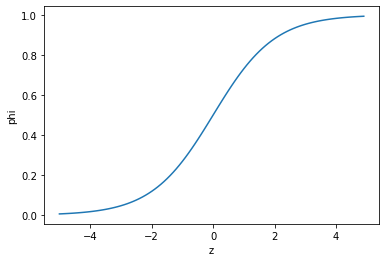

In [79]:
# 시그모이드 함수 그래프 그려보기
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [80]:
# 일단 도미와 빙어로 이진 분류 수행해보기
# 넘파이 배열은 True, False 값을 전달해 행을 선택할 수 있다. -> 도미와 빙어만 선택 가능
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [81]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
print(train_bream_smelt)
print(target_bream_smelt)

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [82]:
# 로지스틱 회귀 모델 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

# 처음 5개 샘플 예측
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [83]:
# 예측 확률 확인 - predict_proba() 이용
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [84]:
# 어떤 생선이 양성이고 음성일까?
# 순서에 따라 첫 번째 열이 음성(0), 두 번째 열이 양성(1)이다.
print(lr.classes_)

# Bream(도미)이 음성, Smelt(빙어)가 양성이다.

['Bream' 'Smelt']


In [85]:
# 로지스틱 회귀가 학습한 계수(가중치) 파악
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [86]:
# LogisticRegression으로 z 값 계산하기 -> 시그모이드 함수 적용
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [87]:
# 시그모이드 함수 적용하기
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


- predict_proba(); 음성 클래스와 양성 클래스에 대한 확률 출력
- decision_function(): 양성 클래스에 대한 z값 확인
- coef_와 intercept_: 로지스틱 모델이 학습한 선형 방정식의 계수 확인
- expit(): 시그모이드 함수 적용 -> 0~1 사이의 값 출력

### 로지스틱 회귀로 다중 분류 수행하기
- LogisticRegression은 기본적으로 반복적인 알고리즘으로 모델 훈련.
  - max_iter 매개변수에서 반복 횟수 지정, 여기선 1000으로 늘린다.
- LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제한다.
  - L2 규제 방식 사용
  - 규제를 제어하는 변수는 C이며, 값이 작을수록 규제가 커진다.(alpha와 반대)
  - 여기선 C 값을 20으로 늘린다.

In [88]:
# LogisticRegression으로 다중 분류 모델 훈련
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [89]:
# 처음 5개 샘플에 대한 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [90]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [91]:
# 클래스 정보 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [92]:
# 다중 분류일 때 선형 방정식은 어떤 모습일까?
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- 5개의 특성을 사용하므로 coef_(계수)의 배열의 열은 5개이다.
- 그러나 행이 7개이다. 즉 z(가중치?)를 7개나 계산한다는 의미이다.
- 그러므로 z(가중치?)가 가장 큰 클래스가 예측 클래스가 되는것이다.
- 이진 분류에서는 시그모이드 함수를 사용해 z값을 0~1 사이로 변환했다.
- 그러나 다중 분류는 소프트맥스 함수를 사용해 7개의 z값을 확률로 변환한다.
  - 각각의 지수 함수를 모두 더한 후, 그 더한 값으로 하나의 지수 함수에 나눠주면 됨

In [93]:
# z1~z7 값을 구한 후 소프트맥스 함수를 이용해 확률로 변환해보자
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [98]:
from scipy.special import softmax
proba = softmax(decision, axis=1) # 각 행, 즉 샘플에 대해 소프트멕스 계산 / 지정하지 않으면 배열 전체로 계산함
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
